In [1]:
# Required Libraries
!pip install opencv-python-headless zipfile matplotlib

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [2]:
# Import necessary libraries
from google.colab import drive  # Library for connecting to Google Drive
import cv2
import zipfile
import numpy as np
from PIL import Image
import io
from tabulate import tabulate
import warnings
import shutil
import os
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import random


# Define the path to the zip file and the extraction folder
zip_file_path = '/content/drive/MyDrive/002__DISSERTATION/DATASET/images/sample.zip'
output_folder = 'denoised_images/'


# Mount Google Drive to access files
drive.mount("/content/drive", force_remount=True)


# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mounted at /content/drive


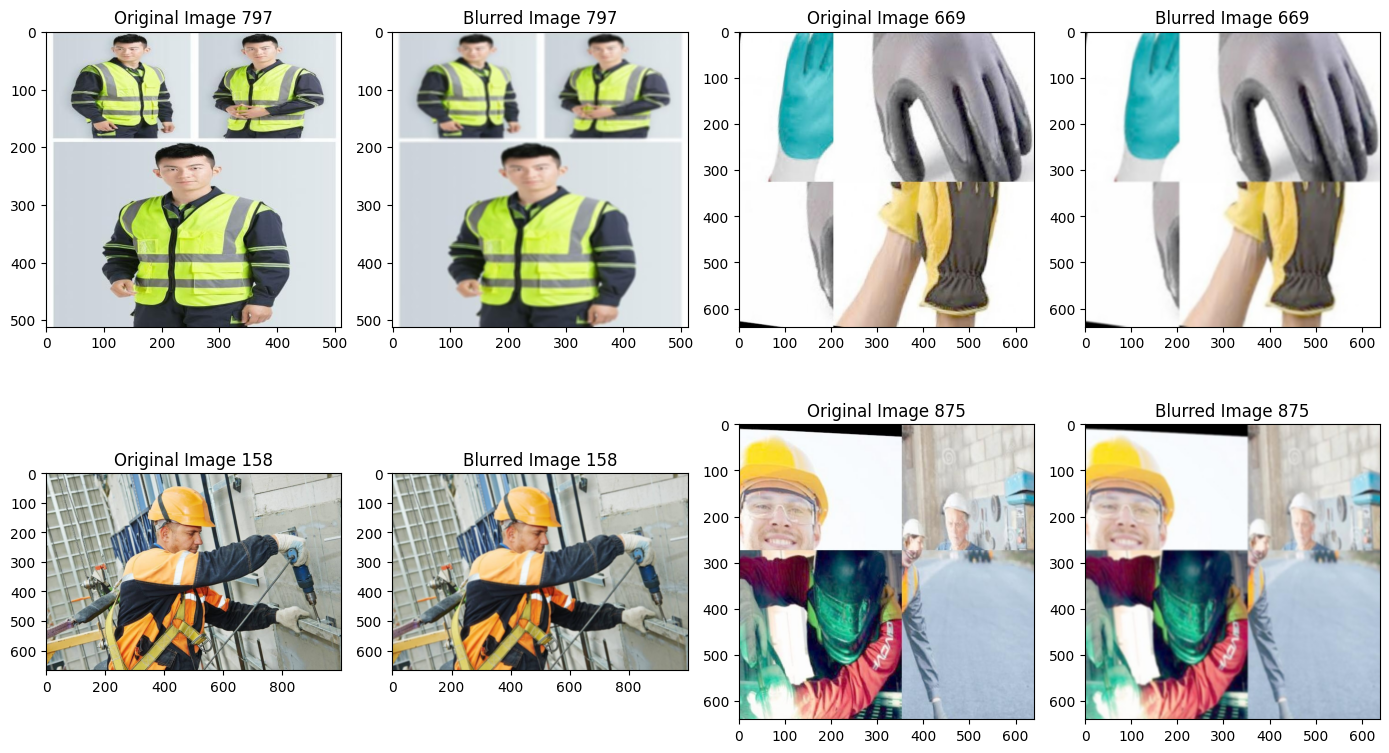

In [7]:
# Create a folder for blurred images
original_folder = 'original_images/'
if os.path.exists(original_folder):
    shutil.rmtree(original_folder)
os.makedirs(original_folder)

blur_folder     = 'blur_images/'
if os.path.exists(blur_folder):
    shutil.rmtree(blur_folder)
os.makedirs(blur_folder)

# Get a list of Blur image paths
orig_image_paths = []
blur_image_paths = []
counter_file_gen = 0

# Traverse the zip archive and collect Blur image paths
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file_info in zip_ref.infolist():
        if file_info.filename.endswith(('.png', '.jpg', '.jpeg')):
            with zip_ref.open(file_info.filename) as file:
                file_data = np.asarray(bytearray(file.read()), dtype=np.uint8)
                img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)
                orig_img_path = os.path.join(original_folder, file_info.filename.split('/')[-1])
                cv2.imwrite(orig_img_path, img)
                orig_image_paths.append(orig_img_path)

                # Apply Gaussian Blur
                blur_img = cv2.GaussianBlur(img, (5, 5), 3.5)
                blur_img_path = os.path.join(blur_folder, file_info.filename.split('/')[-1])
                cv2.imwrite(blur_img_path, blur_img)
                blur_image_paths.append(blur_img_path)
            counter_file_gen +=1

# Shuffle the list of Blur image paths
# random.shuffle(blur_image_paths)

# Create a 2x4 grid for displaying images
fig, axes = plt.subplots(2, 4, figsize=(14, 8))

# Initialize counter for displaying images
image_counter = 0

# Traverse the list of Blur image paths and display 4 original and blurred image pairs
for i in range(2):
    for j in range(2):
        image_counter =  random.randint(0, counter_file_gen)
        original_img_path = orig_image_paths[image_counter]
        original_img = cv2.imread(original_img_path, cv2.IMREAD_COLOR)
        blur_img = cv2.imread(blur_image_paths[image_counter], cv2.IMREAD_COLOR)

        # Convert BGR to RGB for display
        original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        blur_img_rgb = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)

        # Display original image
        axes[i, 2 * j].imshow(original_img_rgb)
        axes[i, 2 * j].set_title(f"Original Image {image_counter + 1}")
        axes[i, 2 * j].axis('on')

        # Display blurred image
        axes[i, 2 * j + 1].imshow(blur_img_rgb)
        axes[i, 2 * j + 1].set_title(f"Blurred Image {image_counter + 1}")
        axes[i, 2 * j + 1].axis('on')

        image_counter += 1

# Show the figure with 8 image pairs in a 2x4 grid
plt.tight_layout()
plt.show()
